# Scoping:

Our plan is to use unsupervised learning (clustering) to cluster(συσταδοποιήσουμε) the customers and in the meanwhile to understand our data. So we have to model the dataset into a Customer Centric dataset.

## 1. Gather Data

### 1.1 Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('/Users/liakooras/Desktop/Msc/CAPSTONE/Dataset (1).csv')

In [7]:
df = dataset.copy()

In [8]:
df.head()

Transaction ID        Date Customer ID  Gender   Age Product Category  \
0               1  24/11/2023     CUST001    Male  34.0           Beauty   
1               2   27/2/2023     CUST002  Female  26.0         Clothing   
2               3   13/1/2023     CUST003    Male  50.0      Electronics   
3               4   20/4/2023     CUST004  Female   5.0              NaN   
4               5   21/5/2023     CUST005    Male  37.0         Clothing   

   Quantity  Price per Unit  Total Amount  
0       3.0            50.0         150.0  
1       2.0           500.0        1000.0  
2       1.0            30.0          30.0  
3       1.0            20.0          20.0  
4       1.0           500.0         500.0

# 2. Clean Data

### 2.1 Check data types

In [11]:
#Checking for Dtype and fast look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1050 non-null   int64  
 1   Date              1050 non-null   object 
 2   Customer ID       1050 non-null   object 
 3   Gender            1034 non-null   object 
 4   Age               1014 non-null   float64
 5   Product Category  1042 non-null   object 
 6   Quantity          1013 non-null   float64
 7   Price per Unit    1011 non-null   float64
 8   Total Amount      1009 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 74.0+ KB


In [12]:
#Number of observations : 1050 , Features: 9
df.shape

(1050, 9)

It seems that we have few issues :
- ['Date']  Type: object - Expected : DateTime


In [14]:
df.Date = pd.to_datetime(df['Date'])

/var/folders/kw/6d_1c0rj22d1pqvkf0fldhlm0000gn/T/ipykernel_1797/646020033.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.Date = pd.to_datetime(df['Date'])


In [15]:
# we good to go
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

### b. Resolve Data Issues : NaN's

Check for missing data, inconsistent text and typos, duplicate data and outliers.

In [18]:
(37/1050)*100

3.5238095238095237

In [19]:
df.isna().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender              16
Age                 36
Product Category     8
Quantity            37
Price per Unit      39
Total Amount        41
dtype: int64

#### Age

In [21]:
df[df.isna().any(axis=1)]

Transaction ID       Date Customer ID  Gender   Age Product Category  \
3                 4 2023-04-20     CUST004  Female   5.0              NaN   
15               16 2023-04-25     CUST016    Male   2.0              NaN   
38               39 2023-03-21     CUST039  Female   NaN      Electronics   
43               44 2023-04-21     CUST044    Male   NaN      Electronics   
55               56 2023-02-10     CUST056     NaN   NaN           Beauty   
60               61 2023-01-23     CUST061     NaN   NaN           Beauty   
70               71 2023-07-05     CUST071  Female   NaN           Beauty   
78               79 2023-01-23     CUST079  Female   NaN      Electronics   
79               80 2023-02-10     CUST080    Male   NaN         Clothing   
80               81 2023-10-10     CUST081    Male   NaN         Clothing   
83               84 2023-08-21     CUST084     NaN   NaN         Clothing   
111             112 2023-07-25     CUST112  Female   NaN           Beauty   
119             120 2023-06-11     CUST120  Female   NaN              NaN   
125             126 2023-05-16     CUST126    Male   NaN           Beauty   
126             127 2023-03-13     CUST127    Male   NaN           Beauty   
127             128 2023-05-07     CUST128    Male   NaN      Electronics   
128             129 2023-10-15     CUST129    Male   NaN      Electronics   
143             144 2023-10-26     CUST144    Male   NaN           Beauty   
198             199 2023-09-08     CUST199    Male   NaN           Beauty   
212             213 2023-01-30     CUST213    Male   NaN           Beauty   
236             237 2023-12-20     CUST237    Male   NaN           Beauty   
290             291 2023-07-26     CUST291    Male   NaN           Beauty   
308             309 2023-02-08     CUST309    Male   NaN         Clothing   
328             329 2023-04-20     CUST329    Male   NaN         Clothing   
329             330 2023-07-25     CUST330    Male   NaN         Clothing   
355             356 2023-01-30     CUST356  Female   NaN         Clothing   
418             419 2023-05-16     CUST419     NaN   NaN         Clothing   
511             512 2023-04-26     CUST512  Female   NaN         Clothing   
539             540 2023-05-11     CUST540     NaN   NaN              NaN   
550             551 2023-03-05     CUST551     NaN   NaN         Clothing   
610             611 2023-03-28     CUST611     NaN   NaN         Clothing   
612             613 2023-01-13     CUST613     NaN   NaN         Clothing   
642             643 2023-09-11     CUST643     NaN   NaN         Clothing   
678             679 2023-05-27     CUST679     NaN   NaN      Electronics   
692             693 2023-02-02     CUST693    Male   NaN              NaN   
706             707 2023-04-16     CUST707     NaN  -8.0      Electronics   
734             735 2023-07-27     CUST735  Female  28.0           Beauty   
749             750 2023-02-12     CUST750     NaN  30.0         Clothing   
763             764 2023-05-10     CUST764     NaN   NaN              NaN   
778             779 2023-01-21     CUST779     NaN   NaN              NaN   
791             792 2023-01-21     CUST792     NaN  23.0         Clothing   
803             804 2023-08-27     CUST804    Male  44.0      Electronics   
836             837 2023-10-17     CUST837  Female  36.0         Clothing   
880             881 2023-01-06     CUST881    Male   NaN              NaN   
909             910 2023-09-01     CUST910     NaN   0.0      Electronics   

     Quantity  Price per Unit  Total Amount  
3         1.0            20.0          20.0  
15        1.0            40.0          40.0  
38        NaN             NaN           NaN  
43        NaN             NaN           NaN  
55        NaN             NaN           NaN  
60        NaN             NaN           NaN  
70        NaN             NaN           NaN  
78        NaN             NaN           NaN  
79        NaN             NaN           NaN  
80

Here we can see also in 692 observation (index) that the we can replace the Quantity value with 2.

In [23]:
#Create a list just as a reminder
list=["Multiple NaN in a single row , on the last 3 Cols","Are the TransactionId and Customer Id the same?"]

In [24]:
df.Age.value_counts()

Age
 43.0    31
 64.0    31
 51.0    30
 57.0    30
 34.0    28
 54.0    28
 22.0    27
 62.0    27
 47.0    26
 42.0    26
 46.0    25
 23.0    25
 40.0    24
 27.0    23
 50.0    23
 60.0    23
 30.0    23
 28.0    22
 55.0    22
 31.0    22
 26.0    22
 35.0    22
 18.0    22
 52.0    22
 41.0    21
 19.0    21
 20.0    21
 25.0    21
 21.0    20
 49.0    19
 56.0    19
 38.0    19
 32.0    19
 61.0    18
 39.0    18
 48.0    18
 63.0    17
 53.0    17
 59.0    17
 45.0    17
 36.0    16
 37.0    16
 29.0    16
 44.0    16
 24.0    15
 58.0    14
 33.0    10
 2.0      1
 5.0      1
-8.0      1
 1.0      1
 0.0      1
Name: count, dtype: int64

In [25]:
df.Age.mean()

41.13510848126233

In [26]:
df.Age.mode()[0]

43.0

It seems like a good practise to fill those null values with the mode as the data a bit right skewed.
But near to the mean.

In [28]:
(16/1050)*100 # The percentage of the missing Age values, it wont make a big impact to our dataset

1.5238095238095237

In [29]:
age_mode=df.Age.mode()[0]
age_mode

43.0

<Axes: xlabel='Age', ylabel='Count'>

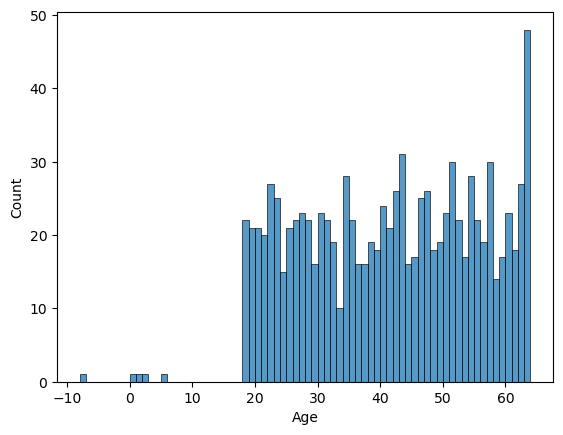

In [30]:
sns.histplot(df.Age,binwidth=1)

In [31]:
df.Age=df.Age.fillna(age_mode)

In [32]:
df.Age.isna().sum()

0

In [33]:
#Fixing outliers , it depends on the scoping whats the minimum Age for a Customer
df.loc[df['Age']< 16,'Age']=16

In [34]:
df.Age.value_counts()

Age
43.0    67
64.0    31
57.0    30
51.0    30
54.0    28
34.0    28
62.0    27
22.0    27
42.0    26
47.0    26
23.0    25
46.0    25
40.0    24
50.0    23
60.0    23
30.0    23
27.0    23
31.0    22
26.0    22
28.0    22
55.0    22
18.0    22
35.0    22
52.0    22
25.0    21
20.0    21
19.0    21
41.0    21
21.0    20
56.0    19
38.0    19
32.0    19
49.0    19
48.0    18
39.0    18
61.0    18
59.0    17
53.0    17
63.0    17
45.0    17
37.0    16
29.0    16
36.0    16
44.0    16
24.0    15
58.0    14
33.0    10
16.0     5
Name: count, dtype: int64

#### Gender

In [36]:
df.Gender.value_counts(dropna=False)

Gender
Female    524
Male      510
NaN        16
Name: count, dtype: int64

In [37]:
df.Gender=df.Gender.fillna('Male')

In [38]:
df.Gender.value_counts()

Gender
Male      526
Female    524
Name: count, dtype: int64

## Note

In [40]:
df.isna().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender               0
Age                  0
Product Category     8
Quantity            37
Price per Unit      39
Total Amount        41
dtype: int64

- For the Product Category : Its a categorical variable with 3 unique Values so we can use KNN Imputation in order to predict where those 8 missing values belong to.
- The Quantity - Price per Unit - Total Amount are in a relationship between them. So lets check the NaN and if we can restore the NaN values in every column from the other two. The main concern is that for every observation if the Values in 2 cols are known then we can fill the 3rd.
- Ill double checkup by this way the Total Amount Column for any inconsistencies by replacing the whole column with
- ['Total Amount'] = ['Quantity'] X ['Price per Unit']

#### Quantity

In [43]:
df.Quantity.value_counts(dropna=False)

Quantity
 4.0    264
 1.0    255
 2.0    243
 3.0    241
 NaN     37
 0.0      5
 5.0      2
-2.0      1
-1.0      1
-4.0      1
Name: count, dtype: int64

In [44]:
#From my point of view it worth replacing NaN with median
quantity_median = df['Quantity'].median()
quantity_median

3.0

In [45]:
df['Quantity']=df['Quantity'].fillna(quantity_median)

In [46]:
df.Quantity.value_counts(dropna=False)

Quantity
 3.0    278
 4.0    264
 1.0    255
 2.0    243
 0.0      5
 5.0      2
-2.0      1
-1.0      1
-4.0      1
Name: count, dtype: int64

In [47]:
# Fixing Outliers
df.loc[df['Quantity']<0,'Quantity']=3

<Axes: xlabel='Quantity', ylabel='Count'>

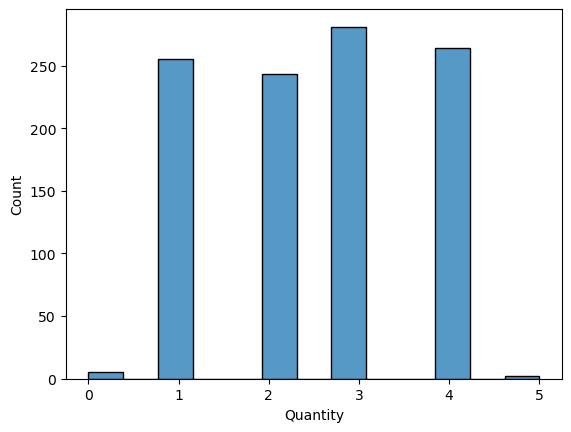

In [48]:
sns.histplot(df['Quantity'])

#### Price per Unit

In [50]:
df['Price per Unit'].value_counts(dropna=False)

Price per Unit
 50.0     211
 25.0     210
 500.0    199
 300.0    197
 30.0     183
 NaN       39
 20.0       4
-20.0       2
 40.0       1
 0.0        1
-30.0       1
 100.0      1
 10.0       1
Name: count, dtype: int64

In [51]:
price_mode=df['Price per Unit'].mode()[0]
price_mode

50.0

In [52]:
df['Price per Unit']=df['Price per Unit'].fillna(price_mode)

In [53]:
df['Price per Unit'].value_counts(dropna=False)

Price per Unit
 50.0     250
 25.0     210
 500.0    199
 300.0    197
 30.0     183
 20.0       4
-20.0       2
 40.0       1
 0.0        1
-30.0       1
 100.0      1
 10.0       1
Name: count, dtype: int64

In [54]:
#Ill fast replace the outlier with the absolut value that might have been --> 20 instead of -20

In [55]:
df.loc[df['Price per Unit']<0,'Price per Unit'] = 20

In [56]:
df['Price per Unit'].value_counts(dropna=False)

Price per Unit
50.0     250
25.0     210
500.0    199
300.0    197
30.0     183
20.0       7
40.0       1
0.0        1
100.0      1
10.0       1
Name: count, dtype: int64

### Total Amount

In [58]:
df.head()

Transaction ID       Date Customer ID  Gender   Age Product Category  \
0               1 2023-11-24     CUST001    Male  34.0           Beauty   
1               2 2023-02-27     CUST002  Female  26.0         Clothing   
2               3 2023-01-13     CUST003    Male  50.0      Electronics   
3               4 2023-04-20     CUST004  Female  16.0              NaN   
4               5 2023-05-21     CUST005    Male  37.0         Clothing   

   Quantity  Price per Unit  Total Amount  
0       3.0            50.0         150.0  
1       2.0           500.0        1000.0  
2       1.0            30.0          30.0  
3       1.0            20.0          20.0  
4       1.0           500.0         500.0

In [59]:
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

In [60]:
df['Total Amount'].value_counts(dropna=False)

Total Amount
50.0      116
100.0     109
150.0      77
200.0      62
900.0      62
1200.0     54
30.0       51
25.0       51
500.0      51
1500.0     50
1000.0     49
60.0       49
2000.0     49
300.0      47
90.0       44
120.0      43
75.0       43
600.0      35
0.0         5
40.0        1
20.0        1
80.0        1
Name: count, dtype: int64

In [61]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    8
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Product Category - KNN Imputation

Importing ML libraries

In [64]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer

In [65]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                        float64
Product Category            object
Quantity                   float64
Price per Unit             float64
Total Amount               float64
dtype: object

In [66]:
df3=df.copy()
df3.head()

Transaction ID       Date Customer ID  Gender   Age Product Category  \
0               1 2023-11-24     CUST001    Male  34.0           Beauty   
1               2 2023-02-27     CUST002  Female  26.0         Clothing   
2               3 2023-01-13     CUST003    Male  50.0      Electronics   
3               4 2023-04-20     CUST004  Female  16.0              NaN   
4               5 2023-05-21     CUST005    Male  37.0         Clothing   

   Quantity  Price per Unit  Total Amount  
0       3.0            50.0         150.0  
1       2.0           500.0        1000.0  
2       1.0            30.0          30.0  
3       1.0            20.0          20.0  
4       1.0           500.0         500.0

In [67]:
#Folding, this helps us define that the "chances" are the same every time we run the code
np.random.seed(42)

In [68]:
# the indices that contain the NaN
missin_rows = df3[df3['Product Category'].isna()].index
missin_rows

Index([3, 15, 119, 539, 692, 763, 778, 880], dtype='int64')

In [69]:
le = LabelEncoder()

In [70]:
df3['Category_Encoded'] = le.fit_transform(df3['Product Category'].astype(str))

In [71]:
df3['Category_Encoded']

0       0
1       1
2       2
3       3
4       1
       ..
1045    1
1046    0
1047    0
1048    2
1049    2
Name: Category_Encoded, Length: 1050, dtype: int64

In [72]:
#reseting the Nan into encode column, in order to be user from fit_transform
df3.loc[missin_rows,'Category_Encoded']=np.nan

In [73]:
#Create dummy variables in Gender Column
df3 = pd.get_dummies(df3,columns=['Gender'], drop_first=True,dtype='int')

In [74]:
df3.head()

Transaction ID       Date Customer ID   Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  34.0           Beauty       3.0   
1               2 2023-02-27     CUST002  26.0         Clothing       2.0   
2               3 2023-01-13     CUST003  50.0      Electronics       1.0   
3               4 2023-04-20     CUST004  16.0              NaN       1.0   
4               5 2023-05-21     CUST005  37.0         Clothing       1.0   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  
0            50.0         150.0               0.0            1  
1           500.0        1000.0               1.0            0  
2            30.0          30.0               2.0            1  
3            20.0          20.0               NaN            0  
4           500.0         500.0               1.0            1

In [75]:
numeric_features = ['Age', 'Quantity', 'Price per Unit']

In [76]:
scaler = MinMaxScaler()

In [77]:
df3[numeric_features]=scaler.fit_transform(df3[numeric_features])

In [78]:
imputation_cols = numeric_features + ['Gender_Male', 'Category_Encoded']

In [79]:
imputer = KNNImputer(n_neighbors=3)

In [80]:
df3[imputation_cols] = imputer.fit_transform(df3[imputation_cols])

In [81]:
df3['Category_Encoded'] = df3['Category_Encoded'].round().astype(int)

In [82]:
imputed_categories=le.inverse_transform(df3['Category_Encoded'])

In [83]:
df3['Product Category Imputed']= imputed_categories

In [84]:
df3.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000              NaN       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  \
0            0.10         150.0                 0          1.0   
1            1.00        1000.0                 1          0.0   
2            0.06          30.0                 2          1.0   
3            0.04          20.0                 1          0.0   
4            1.00         500.0                 1          1.0   

  Product Category Imputed  
0                   Beauty  
1                 Clothing  
2              Electronics  
3                 Clothing  
4                 Clothing

In [85]:
df3['Product Category'] = df3['Product Category Imputed']

In [86]:
df3.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000         Clothing       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  \
0            0.10         150.0                 0          1.0   
1            1.00        1000.0                 1          0.0   
2            0.06          30.0                 2          1.0   
3            0.04          20.0                 1          0.0   
4            1.00         500.0                 1          1.0   

  Product Category Imputed  
0                   Beauty  
1                 Clothing  
2              Electronics  
3                 Clothing  
4                 Clothing

In [87]:
df3=df3.drop(columns='Product Category Imputed')

In [88]:
df3.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Category_Encoded    0
Gender_Male         0
dtype: int64

### c. Duplicates

In [90]:
df3[df3.duplicated(keep=False)]

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Age, Product Category, Quantity, Price per Unit, Total Amount, Category_Encoded, Gender_Male]
Index: []

The are no duplicated values.

In [92]:
list.pop(0)

'Multiple NaN in a single row , on the last 3 Cols'

## 3. Exploratory Data Analysis & Feature Engineering

In [94]:
df3.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000         Clothing       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  
0            0.10         150.0                 0          1.0  
1            1.00        1000.0                 1          0.0  
2            0.06          30.0                 2          1.0  
3            0.04          20.0                 1          0.0  
4            1.00         500.0                 1          1.0

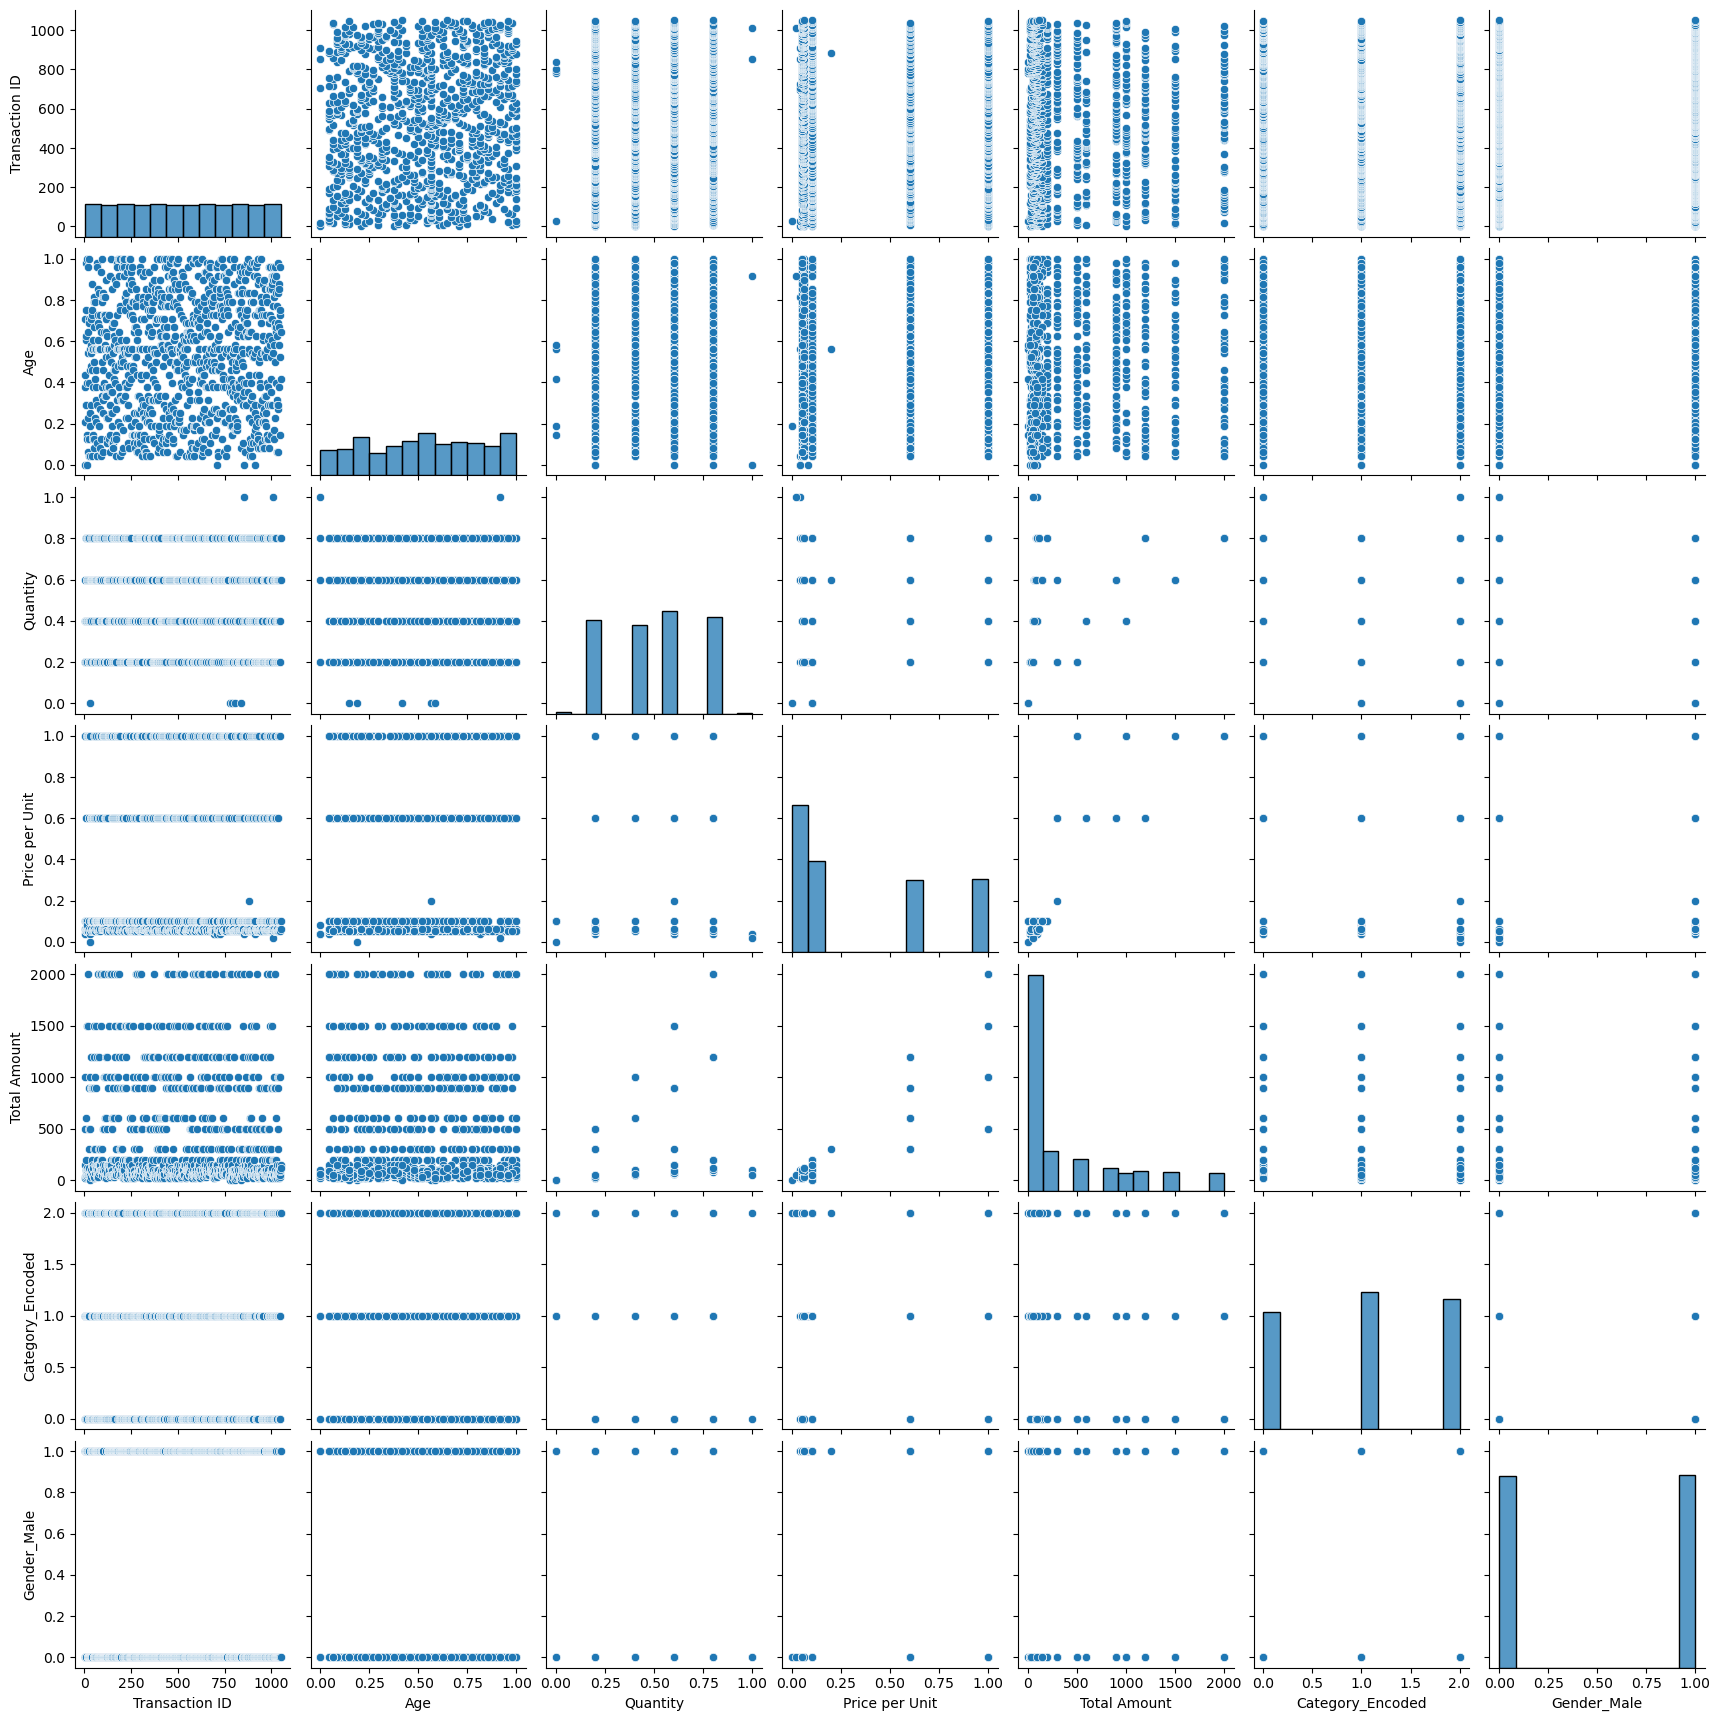

In [95]:
sns.pairplot(df3)

In [96]:
df3.corr(numeric_only=True)

Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID          1.000000  0.065024 -0.028686       -0.043397   
Age                     0.065024  1.000000 -0.015897       -0.030352   
Quantity               -0.028686 -0.015897  1.000000        0.010880   
Price per Unit         -0.043397 -0.030352  0.010880        1.000000   
Total Amount           -0.060592 -0.052628  0.360064        0.854527   
Category_Encoded        0.040092  0.034814 -0.016613       -0.001983   
Gender_Male             0.005090  0.005098 -0.022786       -0.014885   

                  Total Amount  Category_Encoded  Gender_Male  
Transaction ID       -0.060592          0.040092     0.005090  
Age                  -0.052628          0.034814     0.005098  
Quantity              0.360064         -0.016613    -0.022786  
Price per Unit        0.854527         -0.001983    -0.014885  
Total Amount          1.000000         -0.004490    -0.012687  
Category_Encoded     -0.004490          1.000000     0.028433  
Gender_Male          -0.012687          0.028433     1.000000

# Correlation:
- ['Price per Unit'] with ['Total Amount'] : corr = 0.85, There is a huge positive correlation between those 2.
- ['Quantity'] with ['Total Amount'] : corr = 0.360 , Also an important positive correlation.

In [98]:
num_cols = ['Transaction ID', 'Date', 'Customer ID', 'Age', 'Product Category', 'Quantity', 
            'Price per Unit', 'Total Amount', 'Category_Encoded', 'Gender_Male']

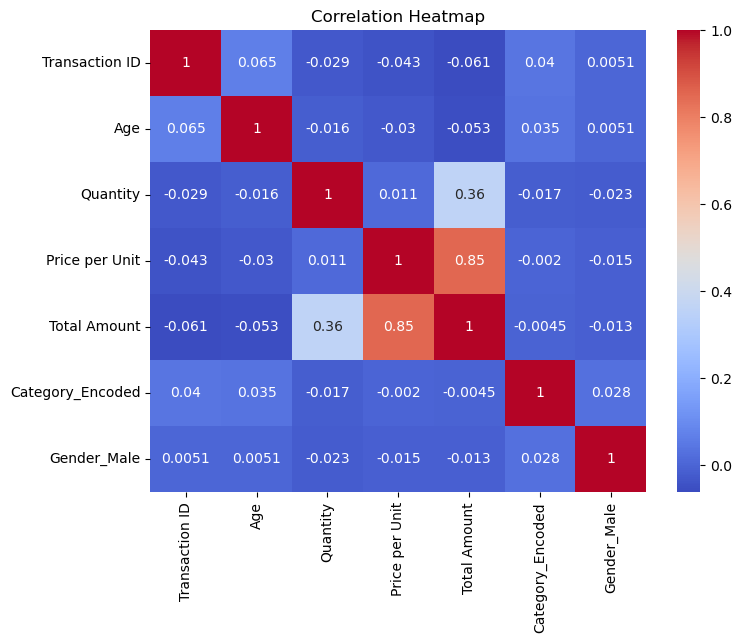

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(df3[num_cols].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

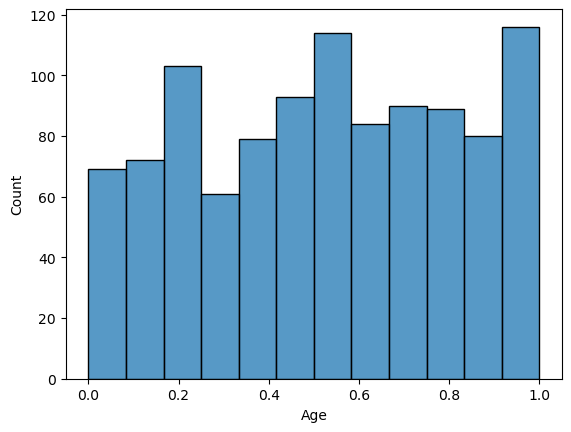

In [100]:
sns.histplot(df3['Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

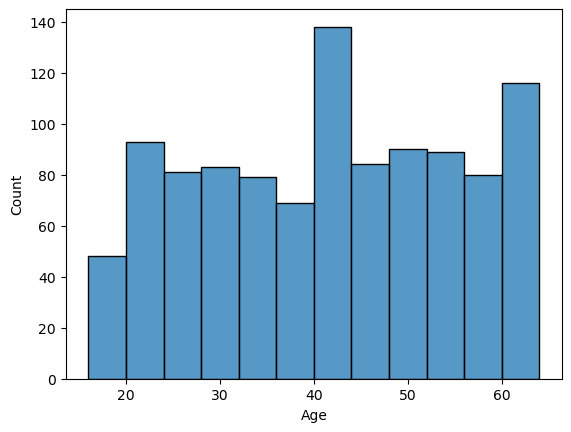

In [101]:
sns.histplot(df['Age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

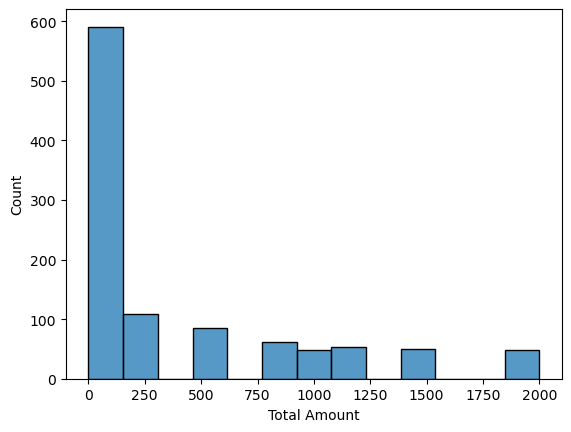

In [102]:
sns.histplot(df['Total Amount'])
plt.show

In [103]:
df3.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000         Clothing       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  
0            0.10         150.0                 0          1.0  
1            1.00        1000.0                 1          0.0  
2            0.06          30.0                 2          1.0  
3            0.04          20.0                 1          0.0  
4            1.00         500.0                 1          1.0

#### Note Beauty:0 Clothing:1 Electronics:2
From the pairplot it seems there is no skewness into our data spread

In [105]:
df4=df3.copy()

In [106]:
df4['Product Category'] = df4['Category_Encoded']

In [107]:
df4.head()

Transaction ID       Date Customer ID       Age  Product Category  \
0               1 2023-11-24     CUST001  0.375000                 0   
1               2 2023-02-27     CUST002  0.208333                 1   
2               3 2023-01-13     CUST003  0.708333                 2   
3               4 2023-04-20     CUST004  0.000000                 1   
4               5 2023-05-21     CUST005  0.437500                 1   

   Quantity  Price per Unit  Total Amount  Category_Encoded  Gender_Male  
0       0.6            0.10         150.0                 0          1.0  
1       0.4            1.00        1000.0                 1          0.0  
2       0.2            0.06          30.0                 2          1.0  
3       0.2            0.04          20.0                 1          0.0  
4       0.2            1.00         500.0                 1          1.0

In [108]:
df4=df4.drop(columns=['Category_Encoded'])

In [109]:
df4.head()

Transaction ID       Date Customer ID       Age  Product Category  \
0               1 2023-11-24     CUST001  0.375000                 0   
1               2 2023-02-27     CUST002  0.208333                 1   
2               3 2023-01-13     CUST003  0.708333                 2   
3               4 2023-04-20     CUST004  0.000000                 1   
4               5 2023-05-21     CUST005  0.437500                 1   

   Quantity  Price per Unit  Total Amount  Gender_Male  
0       0.6            0.10         150.0          1.0  
1       0.4            1.00        1000.0          0.0  
2       0.2            0.06          30.0          1.0  
3       0.2            0.04          20.0          0.0  
4       0.2            1.00         500.0          1.0

In [110]:
#replaced the prefix CUST in order to have only numeric values
df4['Customer ID']=df4['Customer ID'].str.replace('CUST','')

In [111]:
df4['Customer ID']=pd.to_numeric(df4['Customer ID'])

In [112]:
df4.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                  int64
Age                        float64
Product Category             int64
Quantity                   float64
Price per Unit             float64
Total Amount               float64
Gender_Male                float64
dtype: object

#### -  Frequency

In [114]:
df4.groupby('Customer ID')['Transaction ID'].count().reset_index()

Customer ID  Transaction ID
0               1               1
1               2               1
2               3               1
3               4               1
4               5               1
...           ...             ...
1045         1046               1
1046         1047               1
1047         1048               1
1048         1049               1
1049         1050               1

[1050 rows x 2 columns]

It looks like the leftover dataset have only 1 transaction per Customer so we cant see who is a frequent client

#### - How much money every customer Spent

In [117]:
df4.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).reset_index()

Customer ID  Total Amount
0             579        2000.0
1             186        2000.0
2             106        2000.0
3             661        2000.0
4             740        2000.0
...           ...           ...
1045          792           0.0
1046           30           0.0
1047          779           0.0
1048          804           0.0
1049          837           0.0

[1050 rows x 2 columns]

#### - Which Category is the most profitable

In [119]:
df3.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000         Clothing       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  
0            0.10         150.0                 0          1.0  
1            1.00        1000.0                 1          0.0  
2            0.06          30.0                 2          1.0  
3            0.04          20.0                 1          0.0  
4            1.00         500.0                 1          1.0

<Axes: xlabel='Product Category'>

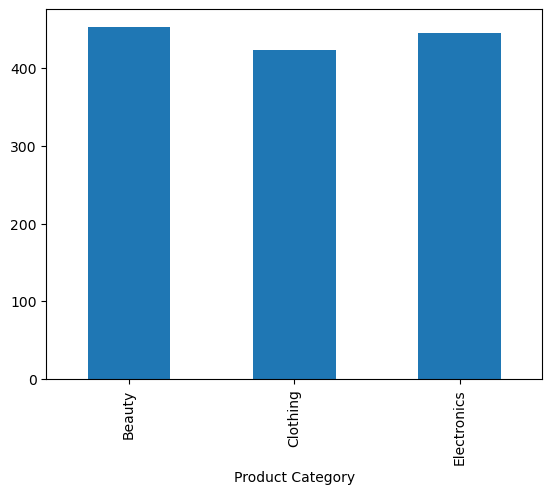

In [120]:
df3.groupby('Product Category')['Total Amount'].mean().plot.bar()

### - Whice gender spents more

<Axes: xlabel='Gender_Male'>

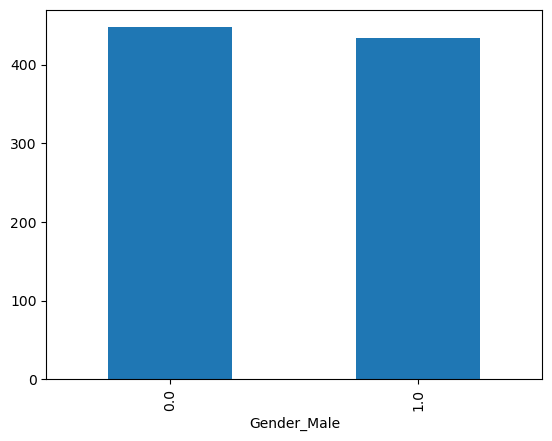

In [122]:
df3.groupby('Gender_Male')['Total Amount'].mean().plot.bar()

It seems that women spend a bit more than Men

### -Which Age spend more

I'll map the ages later in Modeling so the second plot will be easier to understanding

age_mapping={ 

0: 16-20,

1: 20-29,

2: 30-39,

3: 40-49,

4: 50-59,

5: 60-65

}

In [125]:
def map_age_to_bin(age):
    if 16 <= age <= 20:
        return 0
    elif 21 <= age <= 29:
        return 1
    elif 30 <= age <= 39:
        return 2
    elif 40 <= age <= 49:
        return 3
    elif 50 <= age <= 59:
        return 4
    elif 60 <= age <= 65:
        return 5
    else:
        return None

<Axes: xlabel='Age'>

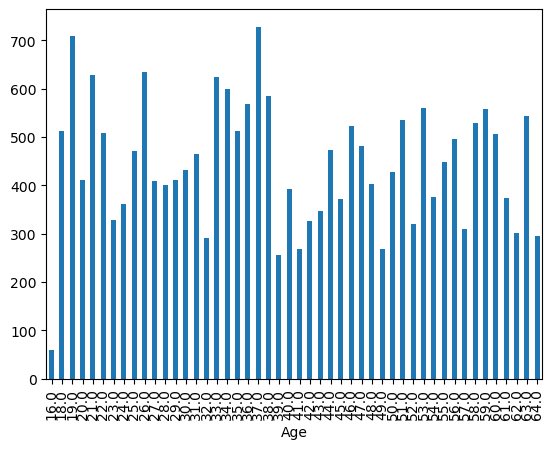

In [126]:
df.groupby('Age')['Total Amount'].mean().plot.bar()

In [127]:
df.Age.max()

64.0

In [128]:
df.Age.min()

16.0

In [129]:
df['Age_Mapped'] = df['Age'].apply(map_age_to_bin)

In [130]:
df['Age_Mapped'].value_counts().sort_index()

Age_Mapped
0     69
1    191
2    193
3    259
4    222
5    116
Name: count, dtype: int64

<Axes: xlabel='Age_Mapped'>

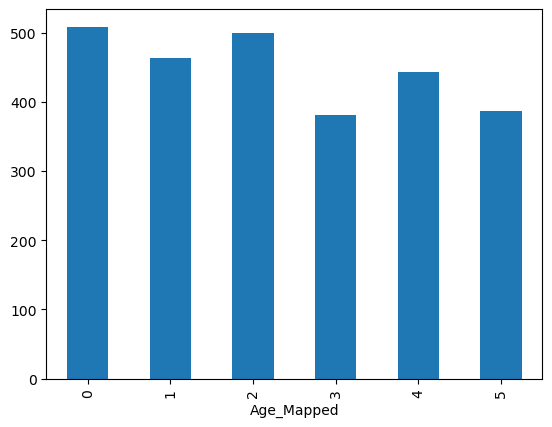

In [131]:
df.groupby('Age_Mapped')['Total Amount'].mean().plot.bar()

### - Total Sales per Month

In [133]:
monthly_sales = df4.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

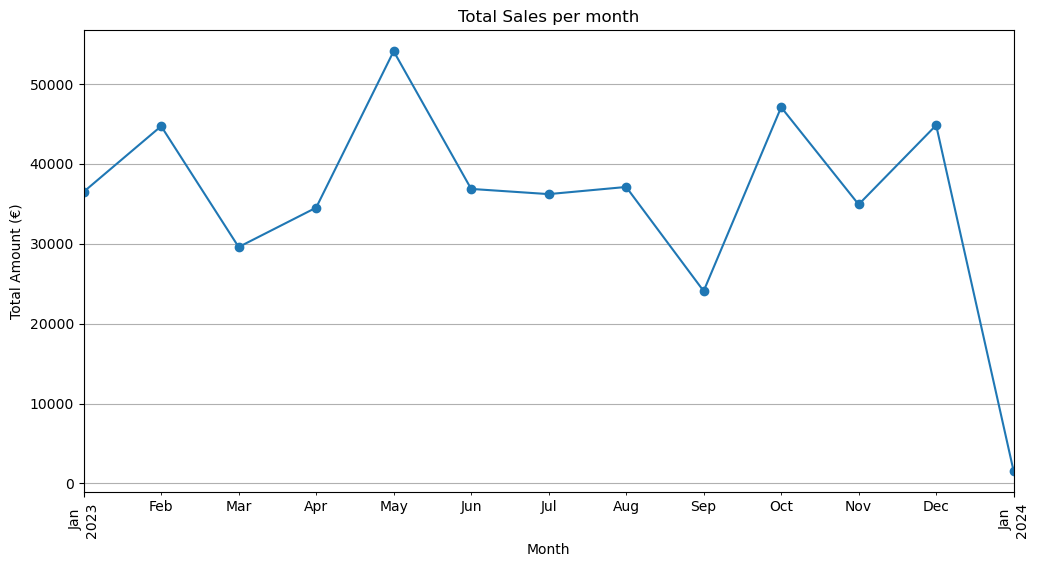

In [134]:
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Total Sales per month')
plt.ylabel('Total Amount (€)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(True) 
plt.show()

In [135]:
daily_sales = df4.groupby(df['Date'].dt.to_period('D'))['Total Amount'].sum()

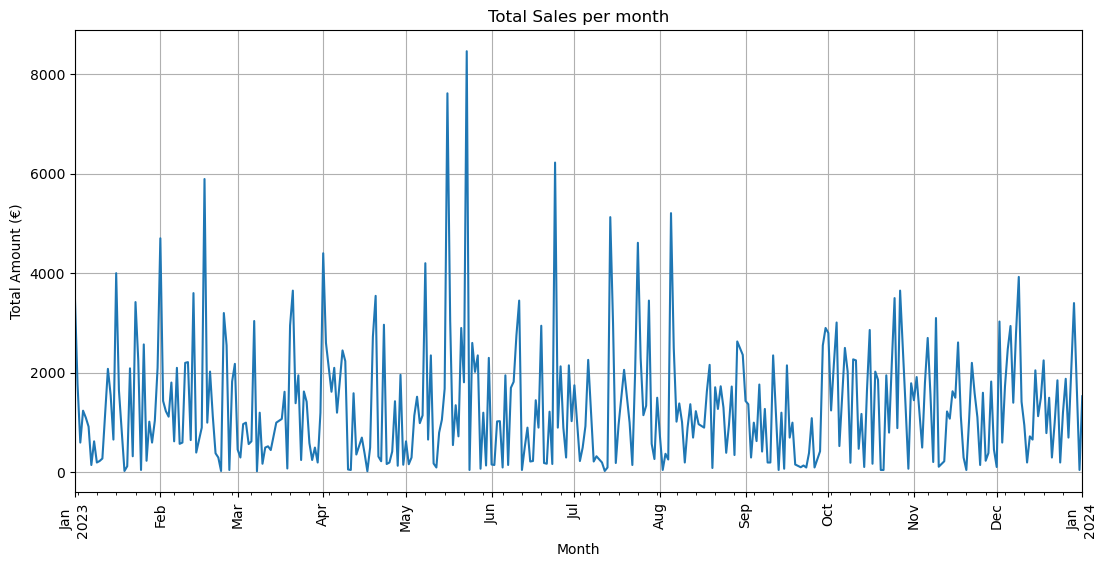

In [136]:
daily_sales.plot(kind='line', figsize=(13, 6))
plt.title('Total Sales per month')
plt.ylabel('Total Amount (€)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid(True) 
plt.show()

Observations:

Peak at May (maybe due to Easter holidays)
Large amounts of sales at February (discount period), as well as while we are heading to Christmas.
Very low amount on January, maybe due to incomplete data.

## Data Modeling & Creation of new Columns

#### I'll create dummy variables for Product Category

In [140]:
category_dummies=pd.get_dummies(df4['Product Category'],dtype='int')


In [141]:
df4=pd.concat([df4,category_dummies],axis=1)

In [142]:
df4=df4.drop(columns='Product Category')

In [143]:
df4.head()

Transaction ID       Date  Customer ID       Age  Quantity  Price per Unit  \
0               1 2023-11-24            1  0.375000       0.6            0.10   
1               2 2023-02-27            2  0.208333       0.4            1.00   
2               3 2023-01-13            3  0.708333       0.2            0.06   
3               4 2023-04-20            4  0.000000       0.2            0.04   
4               5 2023-05-21            5  0.437500       0.2            1.00   

   Total Amount  Gender_Male  0  1  2  
0         150.0          1.0  1  0  0  
1        1000.0          0.0  0  1  0  
2          30.0          1.0  0  0  1  
3          20.0          0.0  0  1  0  
4         500.0          1.0  0  1  0

### Another useful col for modeling is to calculate the days from "today" 

In [145]:
last_purchase = df4.groupby('Customer ID')['Date'].max()
last_purchase.head(2)

Customer ID
1   2023-11-24
2   2023-02-27
Name: Date, dtype: datetime64[ns]

In [146]:
#Im setting 2024-01-01 as "Todays" Date because we have old Sales dates
today=pd.Series(pd.to_datetime('2024-01-01'),index=last_purchase.index)
today.head(2)

Customer ID
1   2024-01-01
2   2024-01-01
dtype: datetime64[ns]

In [147]:
days_between = (today - last_purchase).dt.days.rename('days_between')


In [148]:
days_between.head(20)

Customer ID
1      38
2     308
3     353
4     256
5     225
6     240
7     251
8     294
9     313
10     19
11     86
12    321
13     63
14    149
15    349
16    251
17    350
18    318
19    254
20    246
Name: days_between, dtype: int64

In [149]:
df4.head()

Transaction ID       Date  Customer ID       Age  Quantity  Price per Unit  \
0               1 2023-11-24            1  0.375000       0.6            0.10   
1               2 2023-02-27            2  0.208333       0.4            1.00   
2               3 2023-01-13            3  0.708333       0.2            0.06   
3               4 2023-04-20            4  0.000000       0.2            0.04   
4               5 2023-05-21            5  0.437500       0.2            1.00   

   Total Amount  Gender_Male  0  1  2  
0         150.0          1.0  1  0  0  
1        1000.0          0.0  0  1  0  
2          30.0          1.0  0  0  1  
3          20.0          0.0  0  1  0  
4         500.0          1.0  0  1  0

In [150]:
#adding it to the model df : df4 with left join

In [151]:
df4=df4.merge(days_between,how='left',on='Customer ID')

In [152]:
df4.head()

Transaction ID       Date  Customer ID       Age  Quantity  Price per Unit  \
0               1 2023-11-24            1  0.375000       0.6            0.10   
1               2 2023-02-27            2  0.208333       0.4            1.00   
2               3 2023-01-13            3  0.708333       0.2            0.06   
3               4 2023-04-20            4  0.000000       0.2            0.04   
4               5 2023-05-21            5  0.437500       0.2            1.00   

   Total Amount  Gender_Male  0  1  2  days_between  
0         150.0          1.0  1  0  0            38  
1        1000.0          0.0  0  1  0           308  
2          30.0          1.0  0  0  1           353  
3          20.0          0.0  0  1  0           256  
4         500.0          1.0  0  1  0           225

In [153]:
df4=df4.drop(columns='Date')

In [154]:
df4.head()

Transaction ID  Customer ID       Age  Quantity  Price per Unit  \
0               1            1  0.375000       0.6            0.10   
1               2            2  0.208333       0.4            1.00   
2               3            3  0.708333       0.2            0.06   
3               4            4  0.000000       0.2            0.04   
4               5            5  0.437500       0.2            1.00   

   Total Amount  Gender_Male  0  1  2  days_between  
0         150.0          1.0  1  0  0            38  
1        1000.0          0.0  0  1  0           308  
2          30.0          1.0  0  0  1           353  
3          20.0          0.0  0  1  0           256  
4         500.0          1.0  0  1  0           225

In [155]:
df_for_clustering=df4.copy()

In [156]:
df_for_clustering.head()

Transaction ID  Customer ID       Age  Quantity  Price per Unit  \
0               1            1  0.375000       0.6            0.10   
1               2            2  0.208333       0.4            1.00   
2               3            3  0.708333       0.2            0.06   
3               4            4  0.000000       0.2            0.04   
4               5            5  0.437500       0.2            1.00   

   Total Amount  Gender_Male  0  1  2  days_between  
0         150.0          1.0  1  0  0            38  
1        1000.0          0.0  0  1  0           308  
2          30.0          1.0  0  0  1           353  
3          20.0          0.0  0  1  0           256  
4         500.0          1.0  0  1  0           225

In [157]:
df_for_clustering.rename(columns={'Gender_Male':'Gender',0: 'Beauty', 1: 'Clothing', 2: 'Electronics'}, inplace=True)

In [158]:
df_for_clustering.head()

Transaction ID  Customer ID       Age  Quantity  Price per Unit  \
0               1            1  0.375000       0.6            0.10   
1               2            2  0.208333       0.4            1.00   
2               3            3  0.708333       0.2            0.06   
3               4            4  0.000000       0.2            0.04   
4               5            5  0.437500       0.2            1.00   

   Total Amount  Gender  Beauty  Clothing  Electronics  days_between  
0         150.0     1.0       1         0            0            38  
1        1000.0     0.0       0         1            0           308  
2          30.0     1.0       0         0            1           353  
3          20.0     0.0       0         1            0           256  
4         500.0     1.0       0         1            0           225

In [159]:
#i will remove transaction id because its not useful into clustering

In [160]:
df_for_clustering=df_for_clustering.drop(columns='Transaction ID')

In [161]:
df_for_clustering.head()

Customer ID       Age  Quantity  Price per Unit  Total Amount  Gender  \
0            1  0.375000       0.6            0.10         150.0     1.0   
1            2  0.208333       0.4            1.00        1000.0     0.0   
2            3  0.708333       0.2            0.06          30.0     1.0   
3            4  0.000000       0.2            0.04          20.0     0.0   
4            5  0.437500       0.2            1.00         500.0     1.0   

   Beauty  Clothing  Electronics  days_between  
0       1         0            0            38  
1       0         1            0           308  
2       0         0            1           353  
3       0         1            0           256  
4       0         1            0           225

Now Ill normalize ['Total Amount']

In [163]:
scaler_total_amount=MinMaxScaler()

In [164]:
df_for_clustering['Total Amount']=scaler_total_amount.fit_transform(df_for_clustering[['Total Amount']])

In [165]:
df_for_clustering.head()

Customer ID       Age  Quantity  Price per Unit  Total Amount  Gender  \
0            1  0.375000       0.6            0.10         0.075     1.0   
1            2  0.208333       0.4            1.00         0.500     0.0   
2            3  0.708333       0.2            0.06         0.015     1.0   
3            4  0.000000       0.2            0.04         0.010     0.0   
4            5  0.437500       0.2            1.00         0.250     1.0   

   Beauty  Clothing  Electronics  days_between  
0       1         0            0            38  
1       0         1            0           308  
2       0         0            1           353  
3       0         1            0           256  
4       0         1            0           225

Now I'll normalize ['days_between']

In [167]:
scaler_days= MinMaxScaler()

In [168]:
df_for_clustering['days_between']=scaler_days.fit_transform(df_for_clustering[['days_between']])

In [169]:
df_for_clustering.head()

Customer ID       Age  Quantity  Price per Unit  Total Amount  Gender  \
0            1  0.375000       0.6            0.10         0.075     1.0   
1            2  0.208333       0.4            1.00         0.500     0.0   
2            3  0.708333       0.2            0.06         0.015     1.0   
3            4  0.000000       0.2            0.04         0.010     0.0   
4            5  0.437500       0.2            1.00         0.250     1.0   

   Beauty  Clothing  Electronics  days_between  
0       1         0            0      0.104110  
1       0         1            0      0.843836  
2       0         0            1      0.967123  
3       0         1            0      0.701370  
4       0         1            0      0.616438

## 4. Machine Learning
- We can't approach the RFM analysis model because
- frequency = 1 for every client
- I'll find the best clusters number (k)

In [171]:
from sklearn.cluster import KMeans

In [172]:
features = [
    'Age',
    'Quantity',
    'Price per Unit',
    'Total Amount',
    'Gender',
    'Beauty',
    'Clothing',
    'Electronics',
    'days_between'
]

In [173]:
X= df_for_clustering[features]

In [174]:
#elbow
wcss=[] #within- cluster sum of Squares
k_range=range(1,11) #I'll try in a range till 10 clusters

In [175]:
for k in k_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42,n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the wcss for the specific k

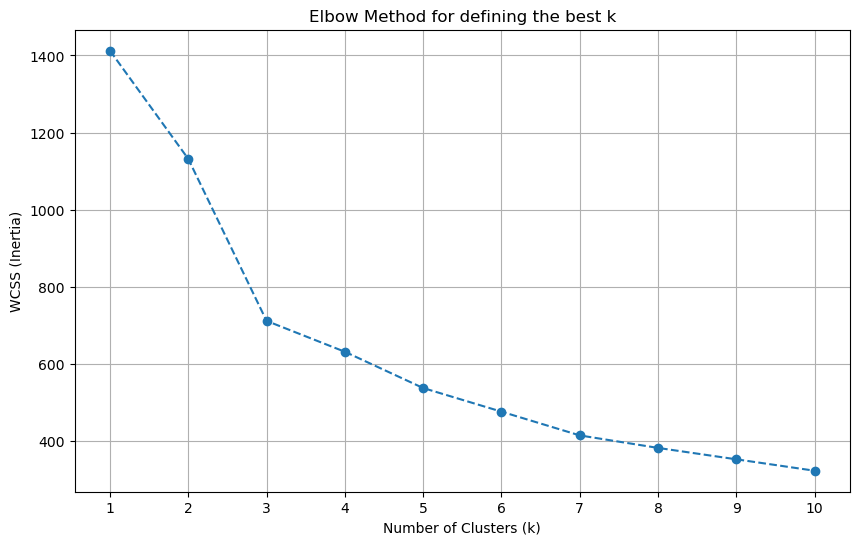

In [176]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for defining the best k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Λίγα λόγια: Inertia = πόσο πυκνά ή συμπαγή είναι τα clusters που δημιουργούνται. Ουσιαστικά Για κάθε σημείο των δεδομένων υπολογίζεται το square distance από το centroid του cluster στο οποίο ανήκει. Έπειτα αυτές οι τετραγωνικές αποστάσεις αθροίζονται για όλα τα σημεία μέσα σε κάθε cluster. Και τέλος το Inertia είναι το συνολικό άθροισμα αυτών των αθροισμάτων από όλα τα clusters. Εκεί που η καμπύλη γίνεται μυτερή είναι ο αγκώνας και είναι το βέλτιστο κ, εκει που δηλαδή όσο μεγαλώνει το cluster μικραίνει το inertia ομαλα.

### Training model KMeans for k=3

In [179]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
kmeans_final.fit(X)

KMeans(n_clusters=3, random_state=42)

In [180]:
cluster_labels = kmeans_final.labels_

In [181]:
# adding it to the df

In [182]:
df_for_clustering['Cluster']=cluster_labels

In [183]:
df_for_clustering.head()

Customer ID       Age  Quantity  Price per Unit  Total Amount  Gender  \
0            1  0.375000       0.6            0.10         0.075     1.0   
1            2  0.208333       0.4            1.00         0.500     0.0   
2            3  0.708333       0.2            0.06         0.015     1.0   
3            4  0.000000       0.2            0.04         0.010     0.0   
4            5  0.437500       0.2            1.00         0.250     1.0   

   Beauty  Clothing  Electronics  days_between  Cluster  
0       1         0            0      0.104110        2  
1       0         1            0      0.843836        0  
2       0         0            1      0.967123        1  
3       0         1            0      0.701370        0  
4       0         1            0      0.616438        0

In [184]:
cluster_analysis = df_for_clustering.groupby('Cluster')[features].mean()
cluster_analysis

Age  Quantity  Price per Unit  Total Amount    Gender  Beauty  \
Cluster                                                                       
0        0.537377  0.508021        0.332914      0.211564  0.521390     0.0   
1        0.532512  0.498592        0.353408      0.223035  0.507042     0.0   
2        0.507399  0.507788        0.356044      0.226597  0.470405     1.0   

         Clothing  Electronics  days_between  
Cluster                                       
0             1.0          0.0      0.540166  
1             0.0          1.0      0.467822  
2             0.0          0.0      0.502983

### Key Findings:

#### Cluster 1: The customers that are buying *clothing*, spend less comparative to the other Categories, they are keen on products with cheaper Price per Unit and their purchases are not that recent.

#### Cluster 2: The customers that are buying *electronics* , made their purchases recently, the amount of money they spent is in the mid.

#### Cluster 3: The customers that are buying *Beauty Products* ,slightly more young aged women, tend to spend more in products with high Price per Unit. 

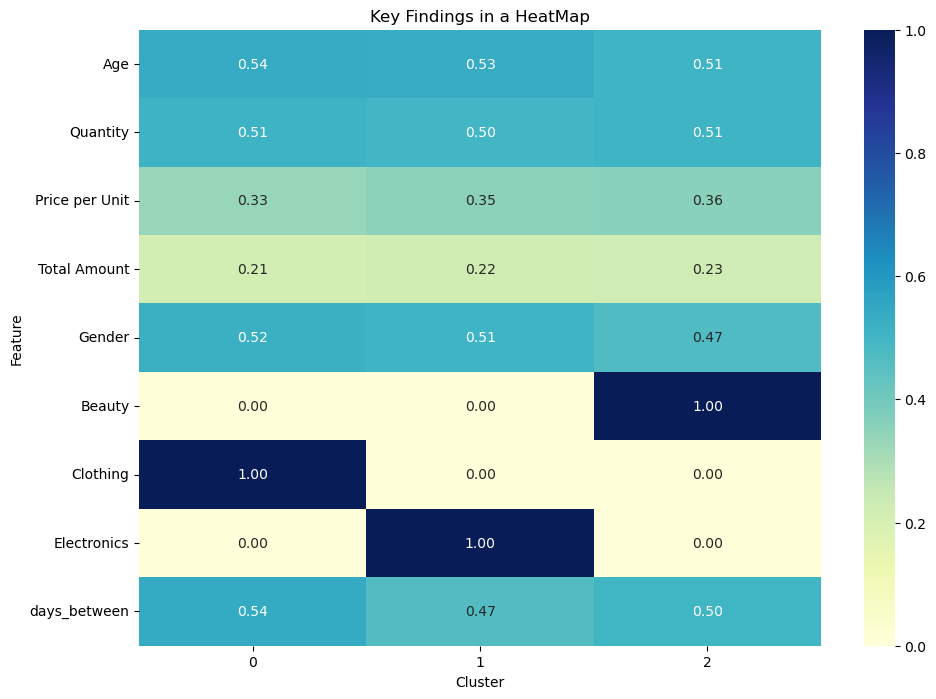

In [189]:
plt.figure(figsize=(11, 8))
sns.heatmap(cluster_analysis.T, annot=True, fmt=".2f", cmap="YlGnBu") 
plt.title('Key Findings in a HeatMap')
plt.ylabel('Feature')
plt.xlabel('Cluster')
plt.show()

/var/folders/kw/6d_1c0rj22d1pqvkf0fldhlm0000gn/T/ipykernel_1797/3302685057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_for_clustering, x='Cluster', y='Total Amount', palette='pastel')


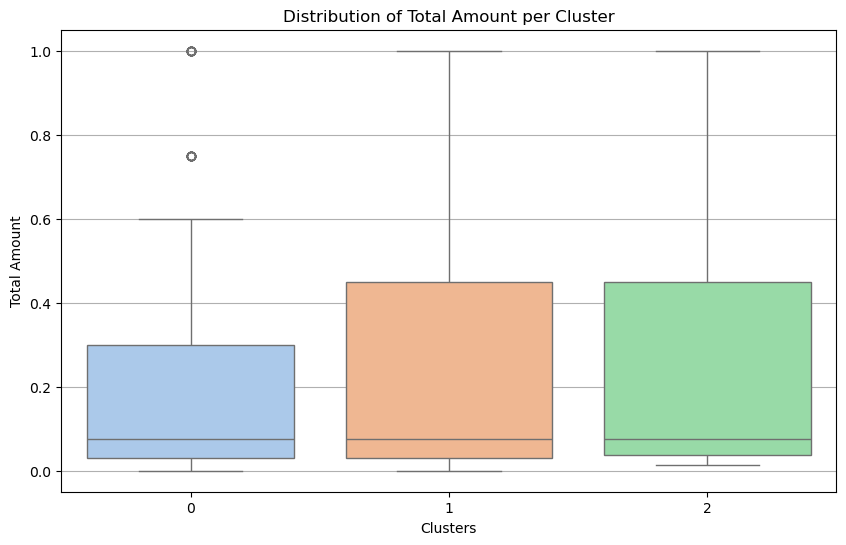

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_for_clustering, x='Cluster', y='Total Amount', palette='pastel')
plt.title('Distribution of Total Amount per Cluster')
plt.xlabel('Clusters')
plt.ylabel('Total Amount')
plt.grid(True, axis='y')
plt.show()

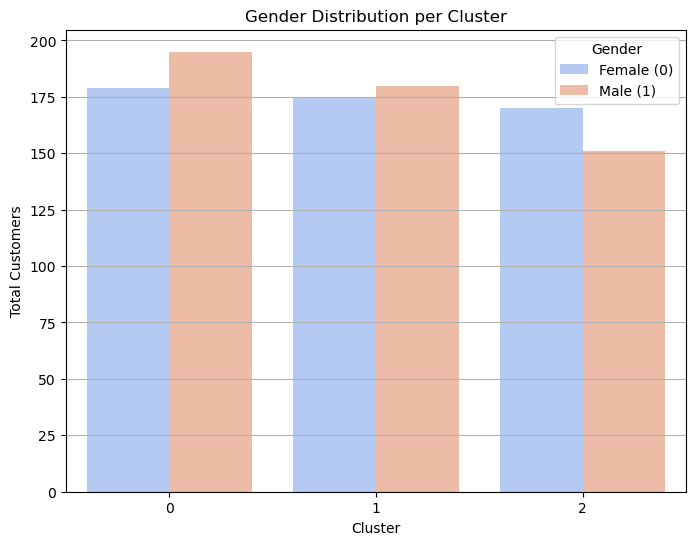

In [191]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_for_clustering, x='Cluster', hue='Gender', palette='coolwarm')
plt.title('Gender Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Customers')
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
plt.grid(True, axis='y')
plt.show()

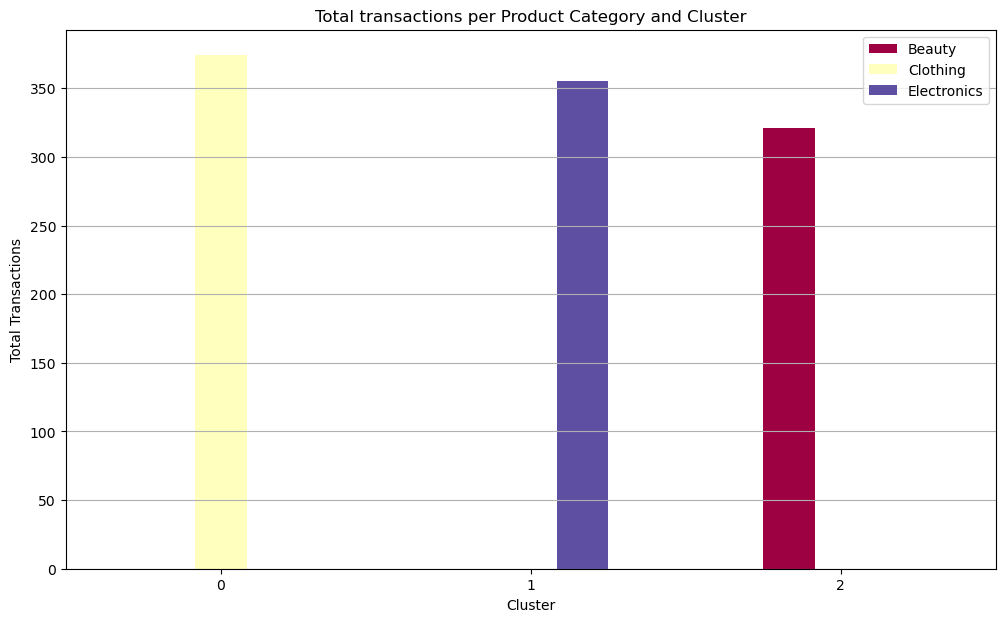

In [192]:
product_cols = ['Beauty', 'Clothing', 'Electronics']
cluster_product_counts = df_for_clustering.groupby('Cluster')[product_cols].sum()

cluster_product_counts.plot(kind='bar', figsize=(12, 7), colormap='Spectral')
plt.title('Total transactions per Product Category and Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Transactions')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

In [193]:
df5 = df3.copy()
df5.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000         Clothing       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Category_Encoded  Gender_Male  
0            0.10         150.0                 0          1.0  
1            1.00        1000.0                 1          0.0  
2            0.06          30.0                 2          1.0  
3            0.04          20.0                 1          0.0  
4            1.00         500.0                 1          1.0

In [194]:
df5=df5.drop(columns='Category_Encoded')

In [195]:
df5.head()

Transaction ID       Date Customer ID       Age Product Category  Quantity  \
0               1 2023-11-24     CUST001  0.375000           Beauty       0.6   
1               2 2023-02-27     CUST002  0.208333         Clothing       0.4   
2               3 2023-01-13     CUST003  0.708333      Electronics       0.2   
3               4 2023-04-20     CUST004  0.000000         Clothing       0.2   
4               5 2023-05-21     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Gender_Male  
0            0.10         150.0          1.0  
1            1.00        1000.0          0.0  
2            0.06          30.0          1.0  
3            0.04          20.0          0.0  
4            1.00         500.0          1.0

In [196]:
df5.Date = pd.to_datetime(df5.Date,format='%y-%m').dt.month

In [197]:
df5.head()

Transaction ID  Date Customer ID       Age Product Category  Quantity  \
0               1    11     CUST001  0.375000           Beauty       0.6   
1               2     2     CUST002  0.208333         Clothing       0.4   
2               3     1     CUST003  0.708333      Electronics       0.2   
3               4     4     CUST004  0.000000         Clothing       0.2   
4               5     5     CUST005  0.437500         Clothing       0.2   

   Price per Unit  Total Amount  Gender_Male  
0            0.10         150.0          1.0  
1            1.00        1000.0          0.0  
2            0.06          30.0          1.0  
3            0.04          20.0          0.0  
4            1.00         500.0          1.0

In [198]:
df5=df5.drop(columns='Transaction ID')

In [199]:
df5.head()

Date Customer ID       Age Product Category  Quantity  Price per Unit  \
0    11     CUST001  0.375000           Beauty       0.6            0.10   
1     2     CUST002  0.208333         Clothing       0.4            1.00   
2     1     CUST003  0.708333      Electronics       0.2            0.06   
3     4     CUST004  0.000000         Clothing       0.2            0.04   
4     5     CUST005  0.437500         Clothing       0.2            1.00   

   Total Amount  Gender_Male  
0         150.0          1.0  
1        1000.0          0.0  
2          30.0          1.0  
3          20.0          0.0  
4         500.0          1.0

In [200]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [201]:
result1 = seasonal_decompose(df5['Total Amount'], model='additive', period=12) 

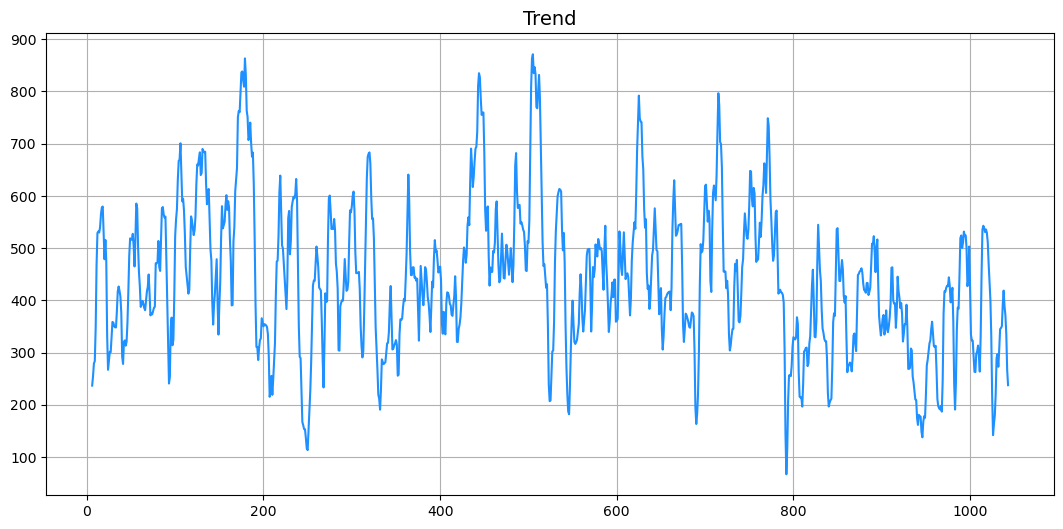

In [202]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(result1.trend.index ,result1.trend.values ,linewidth=1.5,color='dodgerblue')
ax.set_title('Trend',fontsize=14)
ax.grid(True)
plt.show()



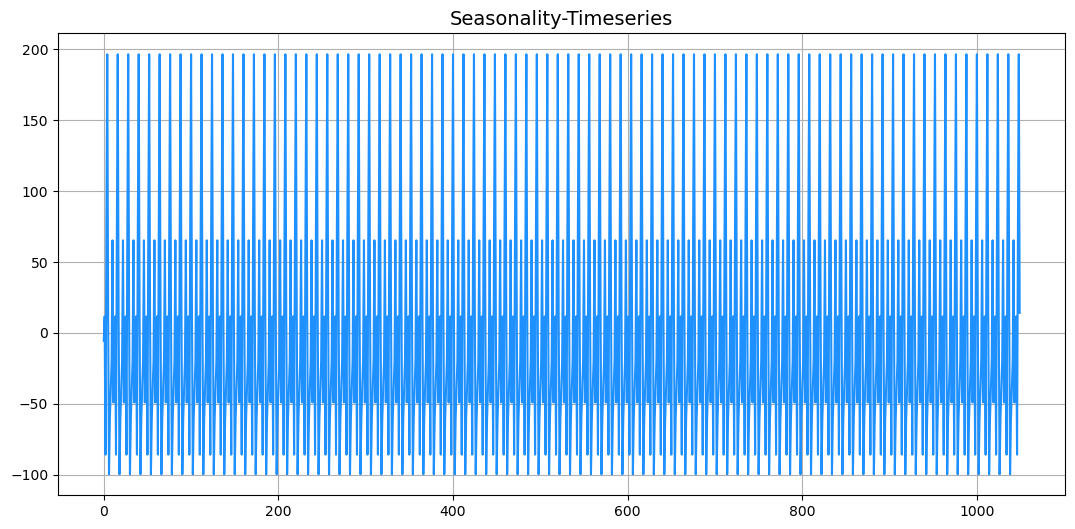

Since there is no frequency(RFM analysis cant be completed) we can verify it from Seasonality through stats model library


In [408]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(result1.seasonal.index ,result1.seasonal.values ,linewidth=1.5,color='dodgerblue')
ax.set_title('Seasonality-Timeseries',fontsize=14)
ax.grid(True)
plt.show()

print("Since there is no frequency(RFM analysis cant be completed) we can verify it from Seasonality through stats model library")



In [204]:
seasonality = df5.groupby(df5.Date)['Total Amount'].mean()
seasonality

Date
1     442.209302
2     496.888889
3     384.285714
4     371.182796
5     478.761062
6     472.628205
7     470.324675
8     386.562500
9     348.985507
10    466.237624
11    447.692308
12    487.391304
Name: Total Amount, dtype: float64

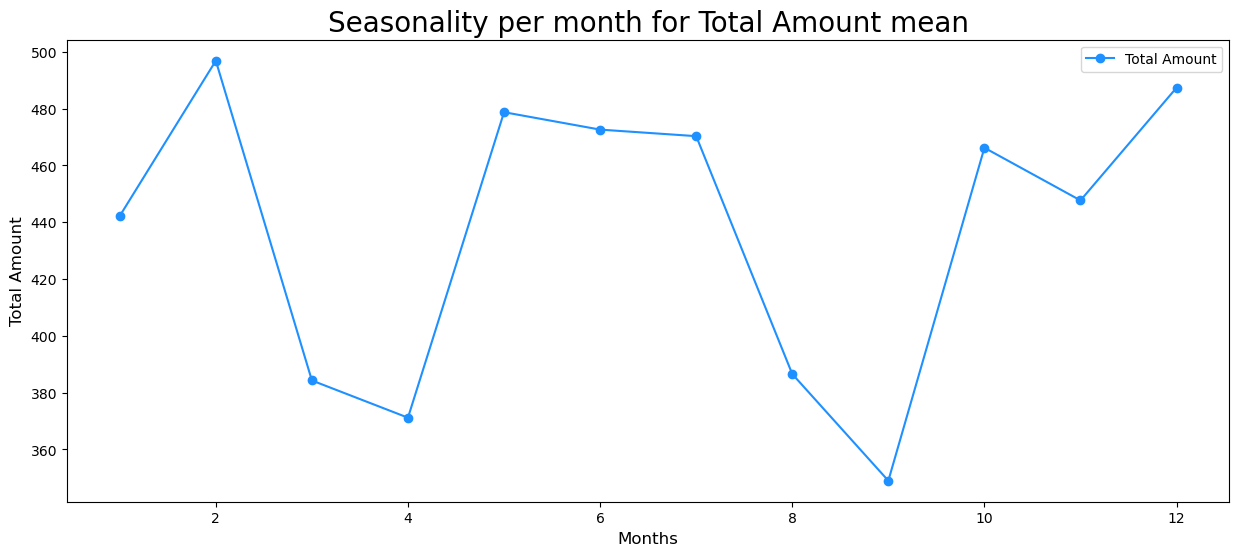

In [205]:
seasonality.plot(kind='line',figsize=(15,6),marker='o',color='dodgerblue')
plt.title('Seasonality per month for Total Amount mean',fontsize=20)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Total Amount',fontsize=12)
plt.legend()
plt.show()

In [206]:
df.Date.max()

Timestamp('2024-01-01 00:00:00')

In [207]:
df5.Date.value_counts()

Date
5     113
10    101
8      96
4      93
12     92
2      90
1      86
11     78
6      78
3      77
7      77
9      69
Name: count, dtype: int64

Seems that from November to February (Period 1) and through Easter till July (Period 2) Retail hub had the most valuable sales. Those periods contains Holidays, where many gifts are being bought but also Discounts, for exaple black friday takes place in the last weekend of Octomber so as we can see at the plot, from the mid of 9th month sales are increasing again, the same position where Period 2 Sales are increasing exponentially.

## Some Plots for Cluster Analysis

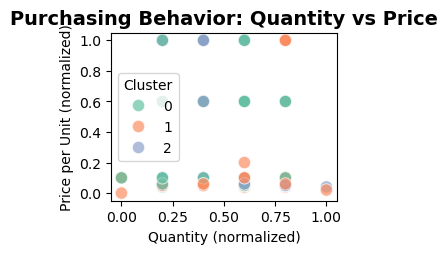

In [281]:
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_for_clustering, 
                x='Quantity', y='Price per Unit', 
                hue='Cluster', 
                palette='Set2', 
                s=80, alpha=0.7)
plt.title('Purchasing Behavior: Quantity vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Quantity (normalized)')
plt.ylabel('Price per Unit (normalized)')
plt.legend(title='Cluster')

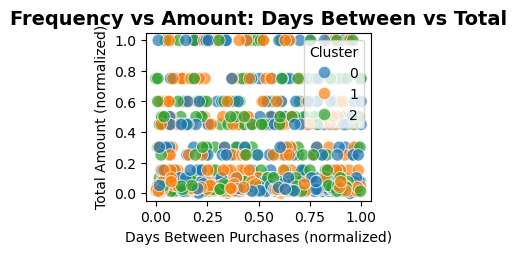

In [373]:
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_for_clustering, 
                x='days_between', y='Total Amount', 
                hue='Cluster', 
                palette='tab10', 
                s=80, alpha=0.7)
plt.title('Frequency vs Amount: Days Between vs Total', fontsize=14, fontweight='bold')
plt.xlabel('Days Between Purchases (normalized)')
plt.ylabel('Total Amount (normalized)')
plt.legend(title='Cluster')

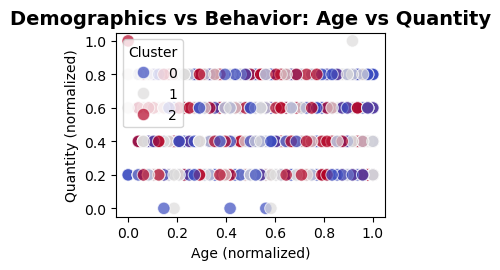

In [377]:
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_for_clustering, 
                x='Age', y='Quantity', 
                hue='Cluster', 
                palette='coolwarm', 
                s=80, alpha=0.7)
plt.title('Demographics vs Behavior: Age vs Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Age (normalized)')
plt.ylabel('Quantity (normalized)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

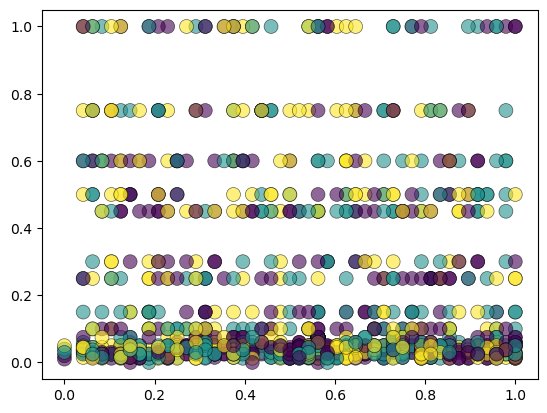

In [379]:
scatter = plt.scatter(df_for_clustering['Age'], 
                     df_for_clustering['Total Amount'],
                     c=df_for_clustering['Cluster'], 
                     cmap='viridis', 
                     s=100, 
                     alpha=0.6, 
                     edgecolors='black', 
                     linewidth=0.5)

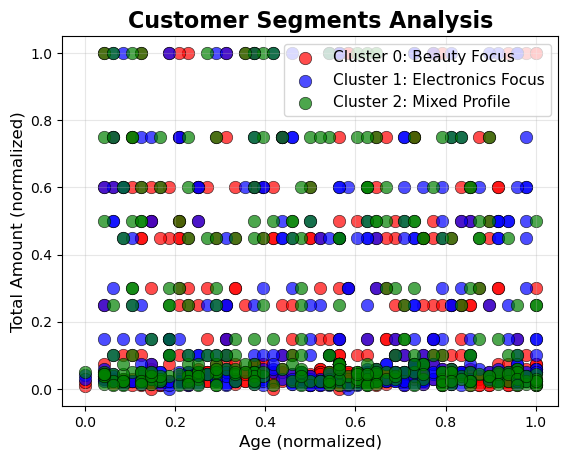

In [385]:
colors = ['red', 'blue', 'green']
cluster_names = ['Beauty Focus', 'Electronics Focus', 'Mixed Profile']

for i in range(3):
    cluster_data = df_for_clustering[df_for_clustering['Cluster'] == i]
    plt.scatter(cluster_data['Age'], 
               cluster_data['Total Amount'],
               c=colors[i], 
               label=f'Cluster {i}: {cluster_names[i]}',
               s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

plt.xlabel('Age (normalized)', fontsize=12)
plt.ylabel('Total Amount (normalized)', fontsize=12)
plt.title('Customer Segments Analysis', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

In [410]:
print("\n" + "="*60)
print(" Stats CLUSTERING:")
print("="*60)
print(f"Total Customers: {len(df_for_clustering)}")
for i in range(3):
    count = len(df_for_clustering[df_for_clustering['Cluster'] == i])
    percentage = (count / len(df_for_clustering)) * 100
    print(f"Cluster {i}: {count} customers ({percentage:.1f}%)")


 Stats CLUSTERING:
Total Customers: 1050
Cluster 0: 374 customers (35.6%)
Cluster 1: 355 customers (33.8%)
Cluster 2: 321 customers (30.6%)


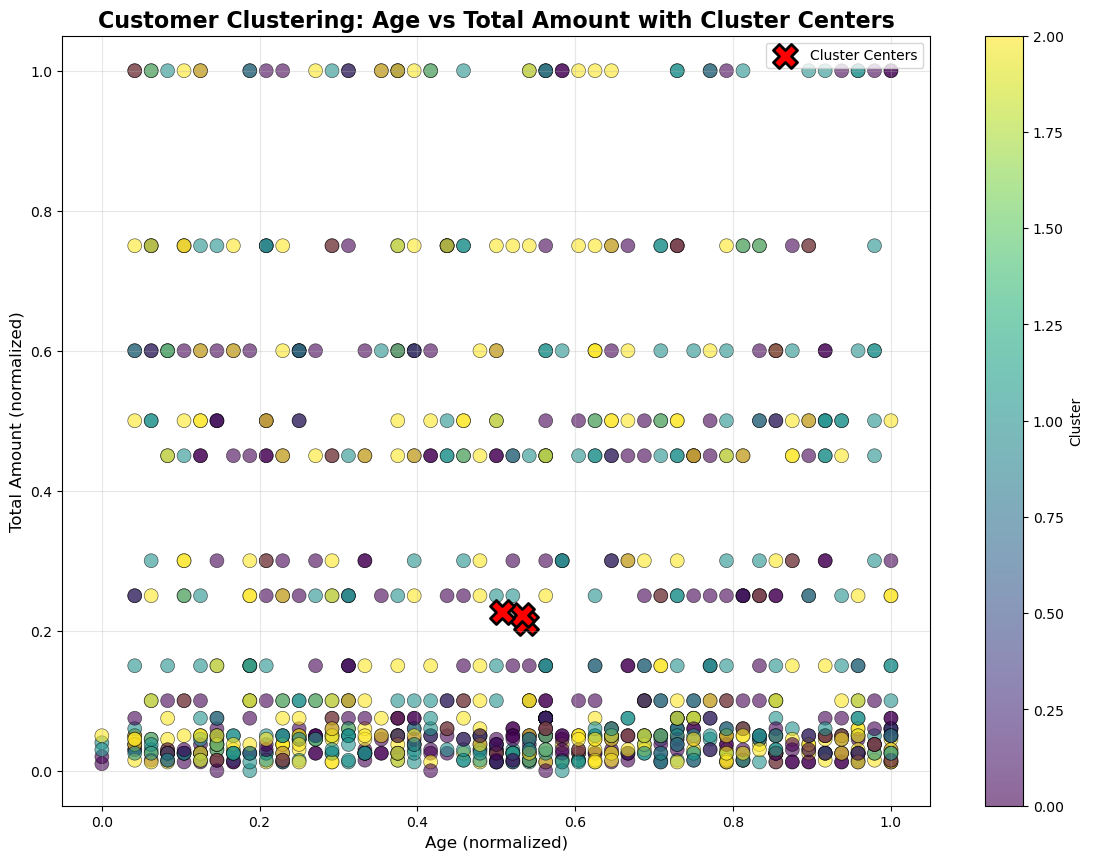

In [418]:
plt.figure(figsize=(14, 10))

# Scatter plot με περισσότερες λεπτομέρειες
scatter = plt.scatter(df_for_clustering['Age'], 
                     df_for_clustering['Total Amount'],
                     c=df_for_clustering['Cluster'], 
                     cmap='viridis', 
                     s=100, 
                     alpha=0.6, 
                     edgecolors='black', 
                     linewidth=0.5)

cluster_centers_age = [0.537377, 0.532512, 0.507399]  # from cluster_analysis
cluster_centers_amount = [0.211564, 0.223035, 0.226597]

plt.scatter(cluster_centers_age, cluster_centers_amount, 
           c='red', marker='X', s=300, 
           edgecolors='black', linewidth=2,
           label='Cluster Centers')

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Age (normalized)', fontsize=12)
plt.ylabel('Total Amount (normalized)', fontsize=12)
plt.title('Customer Clustering: Age vs Total Amount with Cluster Centers', 
          fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

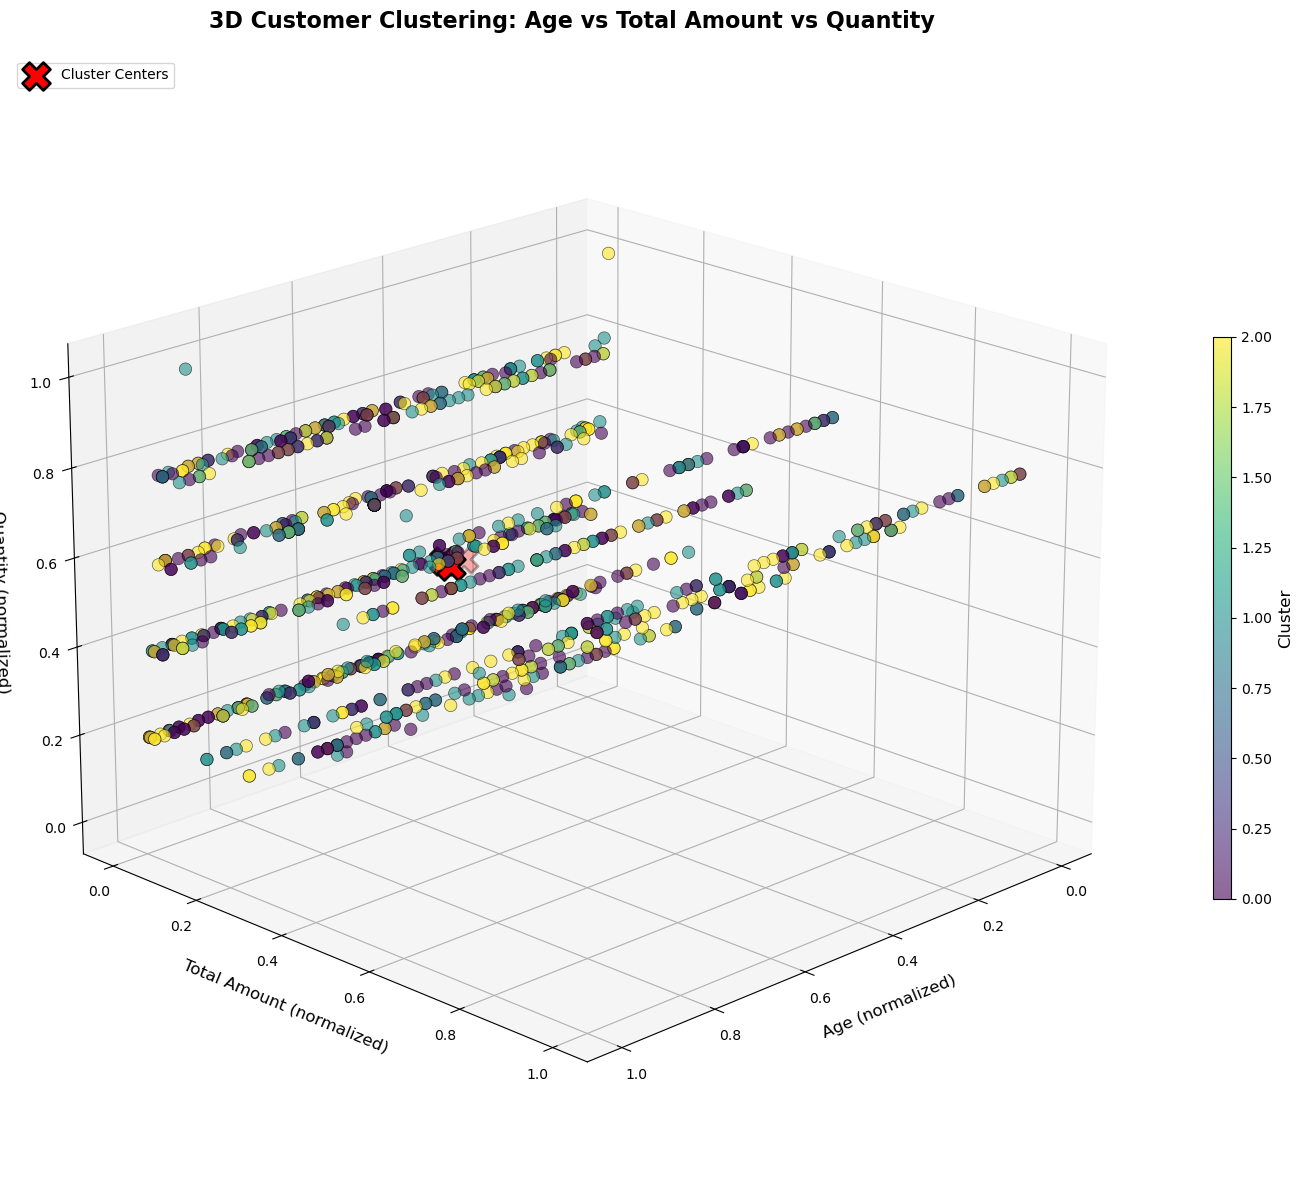

In [416]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(df_for_clustering['Age'], 
                    df_for_clustering['Total Amount'],
                    df_for_clustering['Quantity'],
                    c=df_for_clustering['Cluster'], 
                    cmap='viridis', 
                    s=80, 
                    alpha=0.6, 
                    edgecolors='black', 
                    linewidth=0.5)

cluster_centers_age = [0.537377, 0.532512, 0.507399]  
cluster_centers_amount = [0.211564, 0.223035, 0.226597]
cluster_centers_quantity = [0.508021, 0.498592, 0.507788]  

ax.scatter(cluster_centers_age, cluster_centers_amount, cluster_centers_quantity,
           c='red', marker='X', s=400, 
           edgecolors='black', linewidth=2,
           label='Cluster Centers')


ax.set_xlabel('Age (normalized)', fontsize=12, labelpad=10)
ax.set_ylabel('Total Amount (normalized)', fontsize=12, labelpad=10)
ax.set_zlabel('Quantity (normalized)', fontsize=12, labelpad=10)
ax.set_title('3D Customer Clustering: Age vs Total Amount vs Quantity', 
             fontsize=16, fontweight='bold', pad=20)


cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=30)
cbar.set_label('Cluster', fontsize=12)


ax.legend(loc='upper left')


ax.view_init(elev=20, azim=45)


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


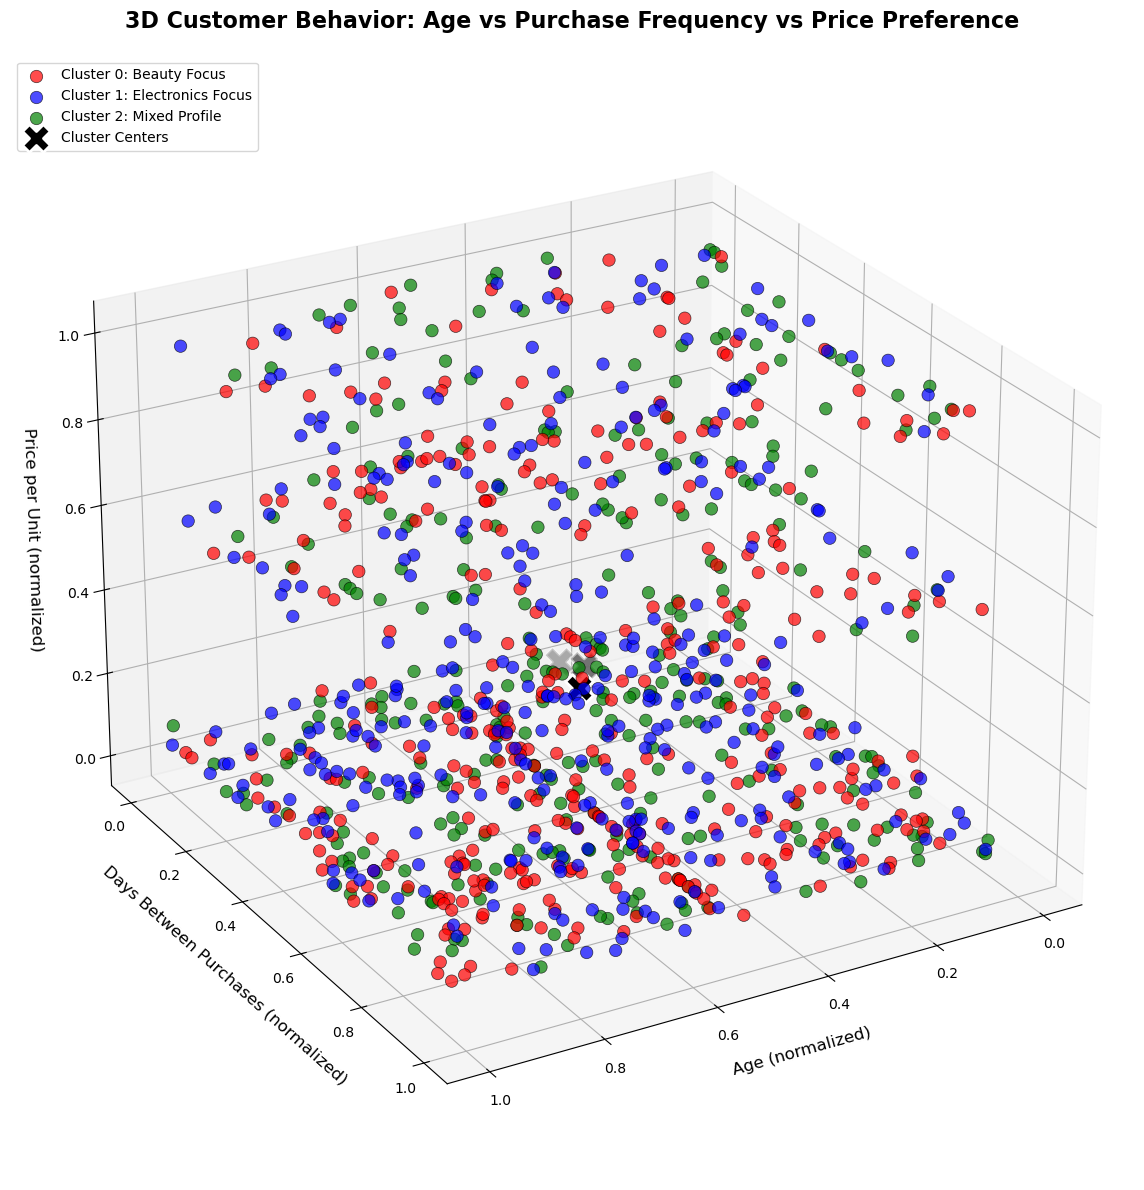

In [412]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']
cluster_names = ['Beauty Focus', 'Electronics Focus', 'Mixed Profile']

for i in range(3):
    cluster_data = df_for_clustering[df_for_clustering['Cluster'] == i]
    ax.scatter(cluster_data['Age'], 
              cluster_data['days_between'],
              cluster_data['Price per Unit'],
              c=colors[i], 
              label=f'Cluster {i}: {cluster_names[i]}',
              s=80, alpha=0.7, edgecolors='black', linewidth=0.5)

cluster_centers_days = [0.540166, 0.467822, 0.502983]  # days_between from cluster_analysis  
cluster_centers_price = [0.332914, 0.353408, 0.356044]  # Price per Unit from cluster_analysis

ax.scatter(cluster_centers_age, cluster_centers_days, cluster_centers_price,
           c='black', marker='X', s=400, 
           edgecolors='white', linewidth=2,
           label='Cluster Centers')

ax.set_xlabel('Age (normalized)', fontsize=12, labelpad=10)
ax.set_ylabel('Days Between Purchases (normalized)', fontsize=12, labelpad=10)
ax.set_zlabel('Price per Unit (normalized)', fontsize=12, labelpad=10)
ax.set_title('3D Customer Behavior: Age vs Purchase Frequency vs Price Preference', 
             fontsize=16, fontweight='bold', pad=20)

ax.legend(loc='upper left', fontsize=10)
ax.view_init(elev=25, azim=60)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

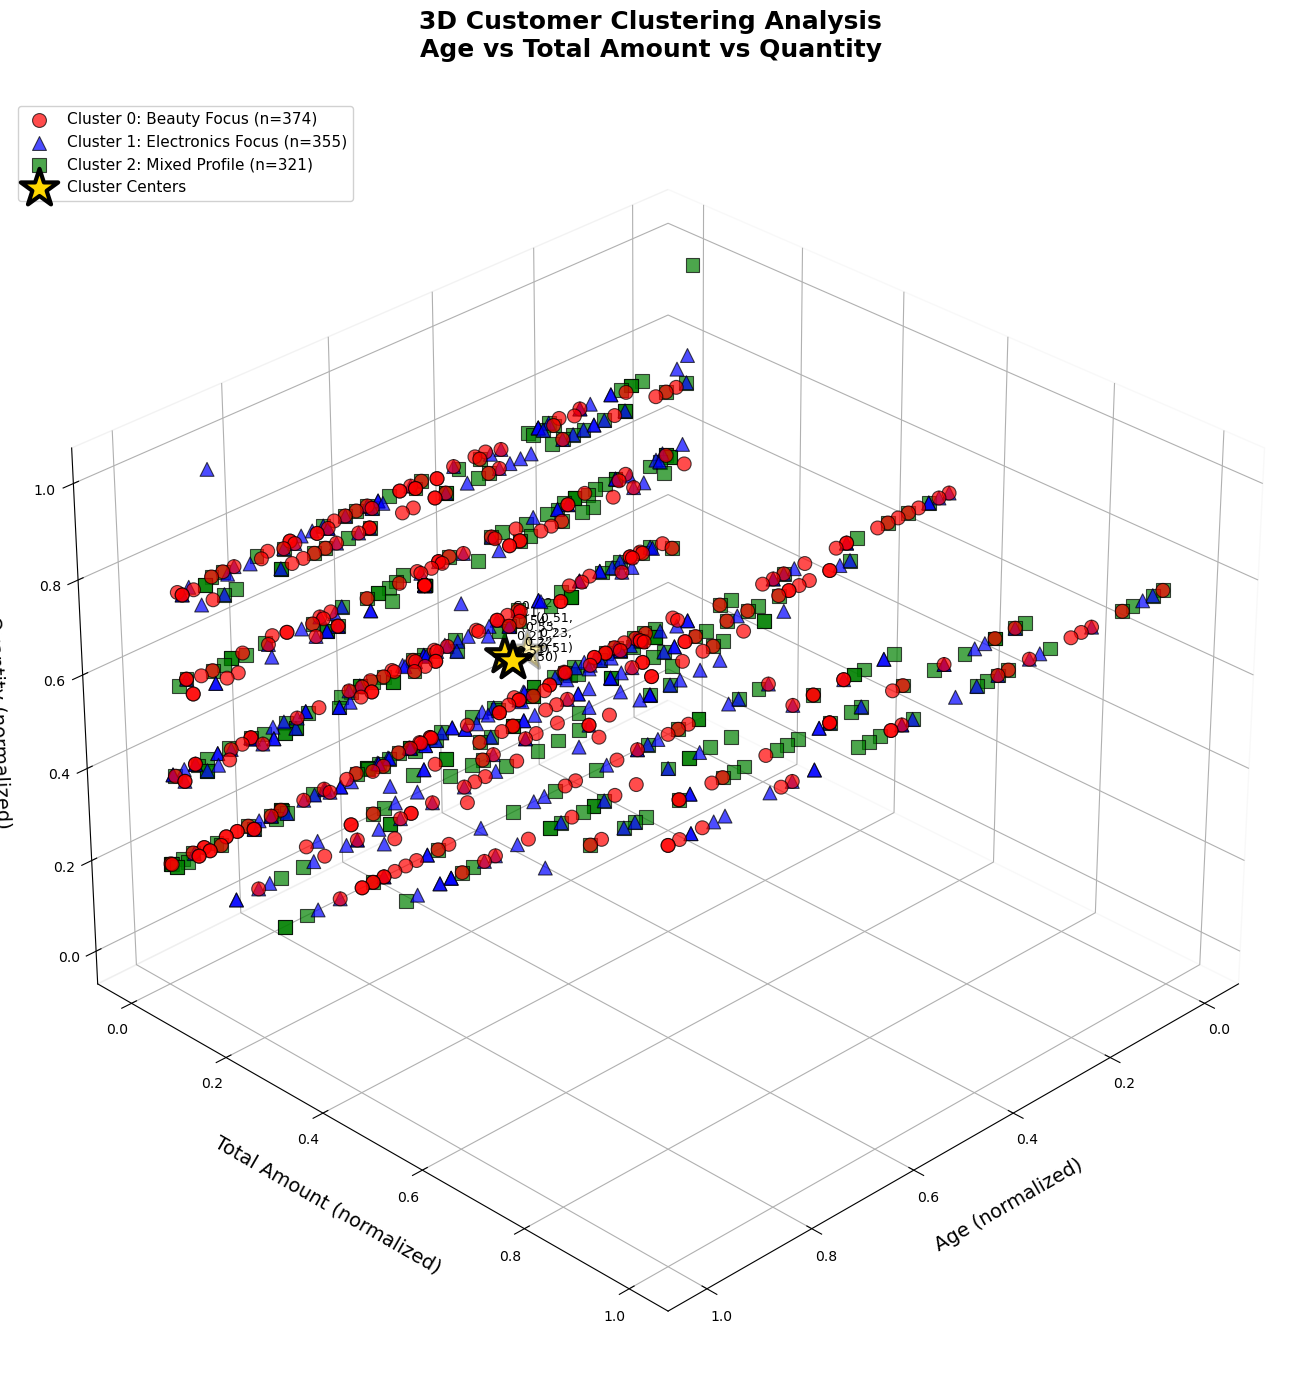

In [414]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

markers = ['o', '^', 's'] 

for i in range(3):
    cluster_data = df_for_clustering[df_for_clustering['Cluster'] == i]
    ax.scatter(cluster_data['Age'], 
              cluster_data['Total Amount'],
              cluster_data['Quantity'],
              c=colors[i], 
              marker=markers[i],
              label=f'Cluster {i}: {cluster_names[i]} (n={len(cluster_data)})',
              s=100, alpha=0.7, edgecolors='black', linewidth=0.8)

ax.scatter(cluster_centers_age, cluster_centers_amount, cluster_centers_quantity,
           c='gold', marker='*', s=800, 
           edgecolors='black', linewidth=3,
           label='Cluster Centers', zorder=10)

for i in range(3):
    ax.text(cluster_centers_age[i], cluster_centers_amount[i], cluster_centers_quantity[i],
            f'  C{i}\n  ({cluster_centers_age[i]:.2f},\n   {cluster_centers_amount[i]:.2f},\n   {cluster_centers_quantity[i]:.2f})',
            fontsize=9, ha='left')

ax.set_xlabel('Age (normalized)', fontsize=14, labelpad=15)
ax.set_ylabel('Total Amount (normalized)', fontsize=14, labelpad=15)
ax.set_zlabel('Quantity (normalized)', fontsize=14, labelpad=15)
ax.set_title('3D Customer Clustering Analysis\nAge vs Total Amount vs Quantity', 
             fontsize=18, fontweight='bold', pad=30)

ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.view_init(elev=30, azim=45)
ax.grid(True, alpha=0.4)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()